In [3]:
from PINNs import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS

In [4]:
dtype=torch.float64
setup_seed(6)
num_x = 400                                                        
num_t = 100                                                        
num_ic = 1000                                           
num_int = 20000                                            
Time = 0.5
L = 1
Tstart = 0
Tend = 0.5
Xstart = -1
Xend = 2

In [5]:
def train(epoch):
    def closure():
      optimizer.zero_grad()                                              
      
      loss_pde = model.loss_pde(x_int) 
      loss_ic = model.loss_ic(x_ic,u_ic)
      #loss_bd =  0.0*model.loss_bd(x_bdL_ignore,u_bdL_ignore)
      loss = loss_pde + 10*loss_ic#+10*loss_bd 

      print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ic:{loss_ic:.8f}')
      loss.backward()
      return loss
    loss = optimizer.step(closure)
    return loss 

In [6]:
x_ic,x_bc,x_int = Mesh_Data(num_x,num_t,Tstart,Tend, Xstart,Xend)

xlimits = np.array([[0.,Time],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_int= sampling(num_int)

xlimits = np.array([[0.,0.0],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic= sampling(num_ic)


u_ic = IC_Combination_Wave(x_ic)
x_ic = torch.tensor(x_ic, dtype=dtype).to(cuda)
u_ic = torch.tensor(u_ic, dtype=dtype).to(cuda)
x_int= torch.tensor(x_int,requires_grad=True,dtype=dtype).to(cuda)

In [7]:
model = PINNs_scalar_1D(Nl=5,Nn=30).to(cuda).double()

epoch = 0
epochi = epoch
lr = 0.001                                                           # Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 100000
loss_history=[]
tic = time.time()
for epoch in range(1+epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    if loss < 0.05:
        break
toc = time.time()
print(f'Total training time: {toc - tic}')

epoch 1 loss_pde:0.00006403, loss_ic:0.22644919
loss_tot:2.26455593
epoch 2 loss_pde:0.00011772, loss_ic:0.20466365
loss_tot:2.04675422
epoch 3 loss_pde:0.00020039, loss_ic:0.18517153
loss_tot:1.85191573
epoch 4 loss_pde:0.00032062, loss_ic:0.16790440
loss_tot:1.67936464
epoch 5 loss_pde:0.00048647, loss_ic:0.15280009
loss_tot:1.52848737
epoch 6 loss_pde:0.00070160, loss_ic:0.13985806
loss_tot:1.39928223
epoch 7 loss_pde:0.00096947, loss_ic:0.12912062
loss_tot:1.29217571
epoch 8 loss_pde:0.00129719, loss_ic:0.12063437
loss_tot:1.20764093
epoch 9 loss_pde:0.00169762, loss_ic:0.11441205
loss_tot:1.14581814
epoch 10 loss_pde:0.00219121, loss_ic:0.11038936
loss_tot:1.10608483
epoch 11 loss_pde:0.00280575, loss_ic:0.10837919
loss_tot:1.08659769
epoch 12 loss_pde:0.00357329, loss_ic:0.10803203
loss_tot:1.08389355
epoch 13 loss_pde:0.00452318, loss_ic:0.10882709
loss_tot:1.09279413
epoch 14 loss_pde:0.00567102, loss_ic:0.11013436
loss_tot:1.10701461
epoch 15 loss_pde:0.00700830, loss_ic:0.111

In [8]:
optimizer = torch.optim.LBFGS(model.parameters(),lr=1,max_iter=20)
epochi = epoch

epochs = 2000
tic = time.time()
for epoch in range(epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    #if loss < 0.01:
    #    break
toc = time.time()

print(f'Total training time: {toc - tic}')

epoch 2657 loss_pde:0.00011031, loss_ic:0.00498803
epoch 2657 loss_pde:0.00012513, loss_ic:0.25567813
epoch 2657 loss_pde:0.00011034, loss_ic:0.00497411
epoch 2657 loss_pde:0.00011034, loss_ic:0.00497401
epoch 2657 loss_pde:0.00011036, loss_ic:0.00497379
epoch 2657 loss_pde:0.00011040, loss_ic:0.00497339
epoch 2657 loss_pde:0.00011051, loss_ic:0.00497279
epoch 2657 loss_pde:0.00011088, loss_ic:0.00497118
epoch 2657 loss_pde:0.00011206, loss_ic:0.00496692
epoch 2657 loss_pde:0.00011585, loss_ic:0.00495607
epoch 2657 loss_pde:0.00013280, loss_ic:0.00492575
epoch 2657 loss_pde:0.00019461, loss_ic:0.00486206
epoch 2657 loss_pde:0.00041704, loss_ic:0.00472755
epoch 2657 loss_pde:0.00095914, loss_ic:0.00481494
epoch 2657 loss_pde:0.00083883, loss_ic:0.00452724
epoch 2657 loss_pde:0.00082037, loss_ic:0.00448566
epoch 2657 loss_pde:0.00081143, loss_ic:0.00445062
epoch 2657 loss_pde:0.00075544, loss_ic:0.00443269
epoch 2657 loss_pde:0.00050421, loss_ic:0.00438519
epoch 2657 loss_pde:0.00046620,

<Figure size 432x288 with 0 Axes>

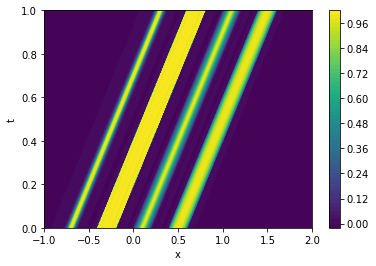

: 

In [18]:
Nd = 400
x = np.linspace(-1, 2, 400)                                  
t = np.linspace(0, 1.0, 400)                                        
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
ue = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
#loss = model.loss_pde(x_test)                                 

import matplotlib.pyplot as plt
plt.figure()
plt.figure()
ax = plt.gca()
cset = ax.contourf(x_grid[:,:],t_grid[:,:],ue,60)
#plt.plot(x[:],u_pred[:,0])

plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(cset, ax=ax)
plt.savefig('CombinationWave.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


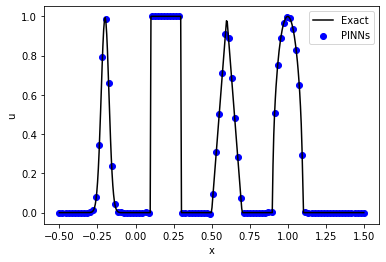

In [16]:
Nd = 400
x = np.linspace(-0.5, 1.5, 100)                                  
t = np.linspace(0.5, 0.5, 1)                         
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
x_e = np.linspace(-0.5, 1.5, Nd)                                  
u_e = np.zeros(Nd)
for i in range(Nd):
    u_e[i] = Combination_wave(x_e[i]-0.5)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_e[:],u_e[:],color='black' ,label='Exact')
plt.scatter(x[:],u[:,0],label='PINNs',color='blue')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.plot(x[:],Exact_u[:,200])
plt.savefig('CombinationWaveLine.eps', format='eps')
plt.show()

In [11]:
Nd = 100
x = np.linspace(-0.5, 1.5, 100)                                  
t = np.linspace(0.5, 0.5, 1)                         
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
x_e = np.linspace(-0.5, 1.5, Nd)                                  
u_e = np.zeros(Nd)
for i in range(Nd):
    u_e[i] = Combination_wave(x_e[i]-0.5)




In [14]:

l2_relative_error(u[:,0],u_e)

0.008012627163801866